### Step 0: Imports and Reading Data


In [7]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mtick
import matplotlib.lines as lines
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('/Users/kaancakir/data/analysis/fedExAnalyis/SCMS_Delivery_History_Dataset.csv')

In [ ]:
df.head()

### Step 0.1: Design the Charts

In [58]:
def chart_styling(ax, fig, title, subtitle, logo_path='logo.png'):
    fig.patch.set_facecolor('#D3D3D3')
    ax.set_facecolor('#D3D3D3')

    fig.text(0.09, 1.05, title, fontsize=18, fontweight='bold', fontfamily='serif')
    fig.text(0.09, 0.99, subtitle, fontsize=12, fontweight='bold', fontfamily='serif')

    logo = mpimg.imread(logo_path)
    logo_ax = fig.add_axes([0.85, 0.85, 0.1, 0.1])
    logo_ax.imshow(logo)
    logo_ax.axis('off')

    ax.grid(axis='y', linestyle='-', alpha=0.2)
    ax.set_axisbelow(True)

    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)

    ax.tick_params(axis='both', which='major', labelsize=12)

    l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
    fig.lines.extend([l1])

    for bar in bars:
        bar.set_color('#008080') 

    # Smooth the appearance
    for bar in bars:
        bar.set_edgecolor('#000000')
        bar.set_linewidth(0.5)

    # Rotate x-axis texts
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


### Step 1: Data Understanding


In [ ]:
print(f"Number of Rows : {df.shape[0]}")
print(f"Number of Columns : {df.shape[1]}")

In [ ]:
df.duplicated().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

In [ ]:
df.describe()

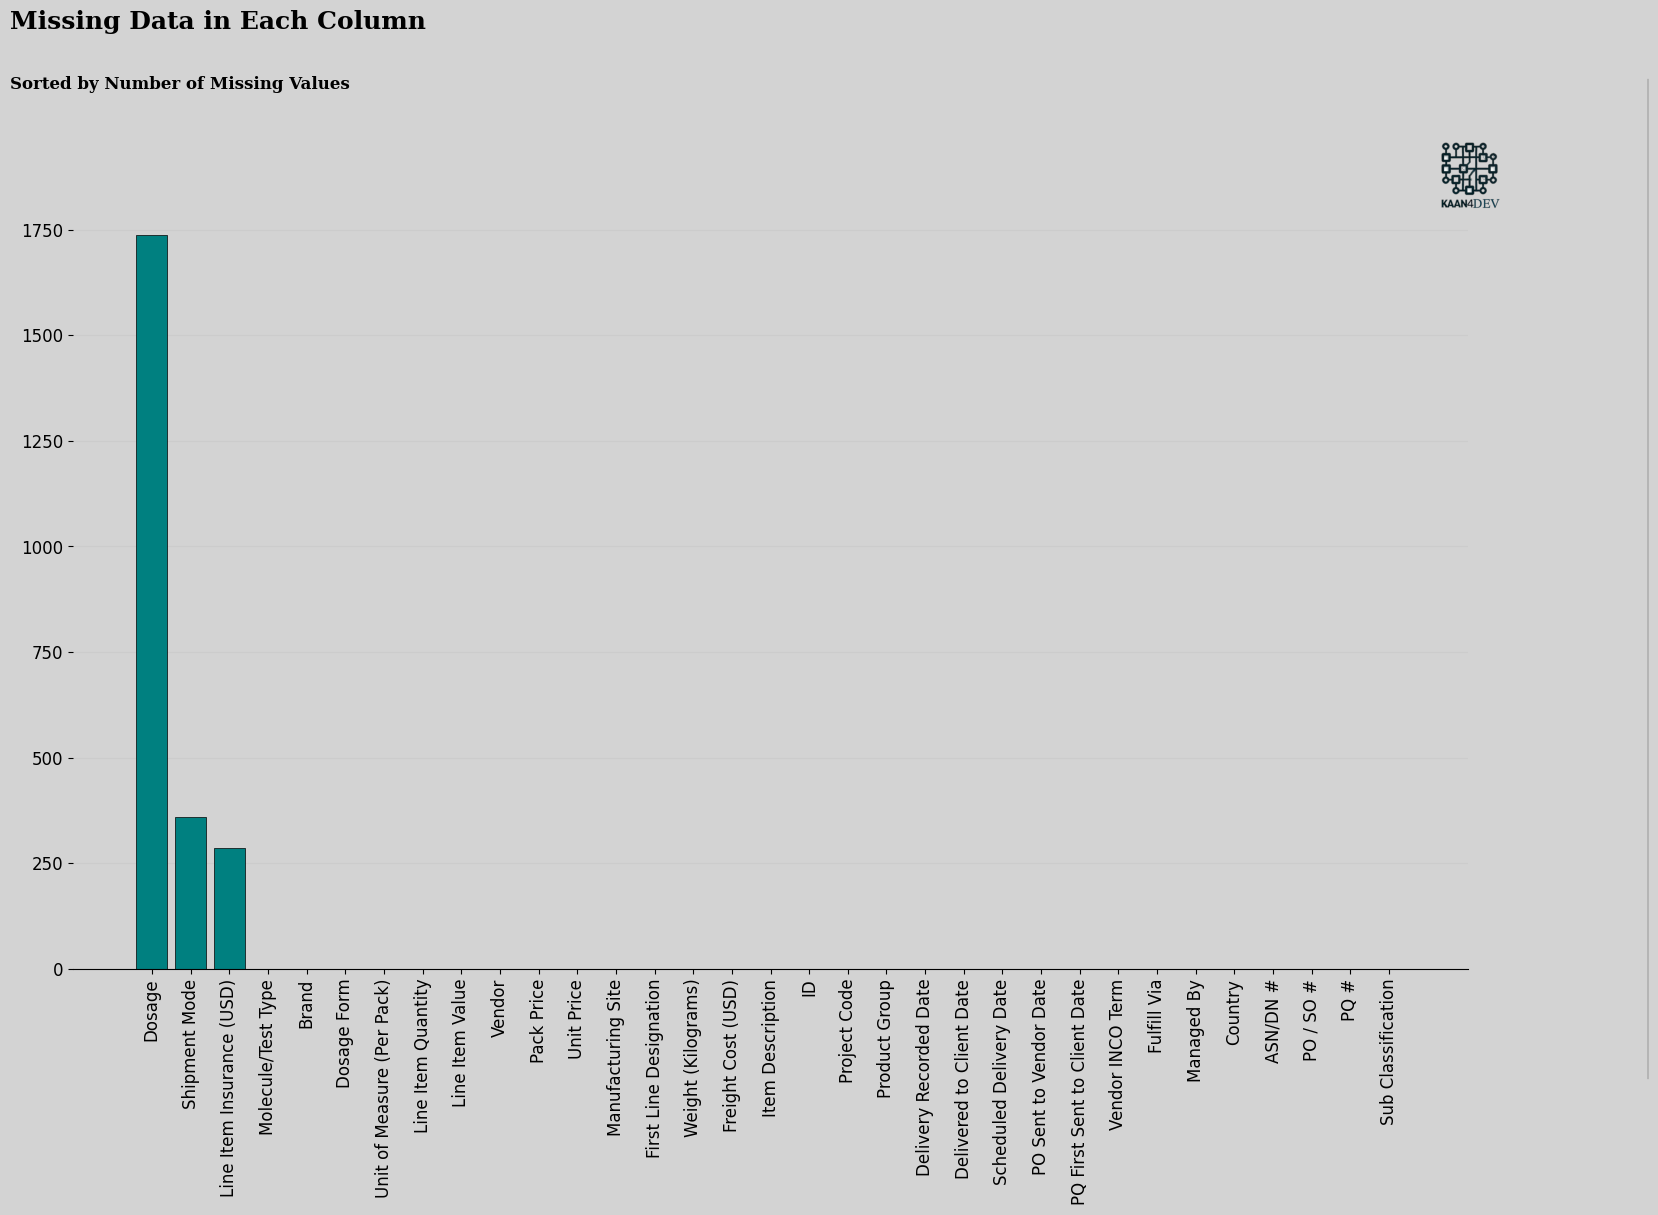

In [70]:
missing_data = df.isnull().sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(18, 10))
bars = ax.bar(missing_data.index, missing_data.values)
title = "Missing Data in Each Column"
subtitle = "Sorted by Number of Missing Values"

chart_styling(ax, fig, title, subtitle)
plt.show()


In [ ]:
for column in df.columns:
    print(f"{column} : {len(df[column].unique())}")

### Step 2: Data Preperation

In [63]:
fedex = df[['Country',
    'Managed By',
    'Fulfill Via',
    'Shipment Mode',
    'PQ First Sent to Client Date',
    'PO Sent to Vendor Date',
    'Scheduled Delivery Date',
    'Delivered to Client Date',
    'Delivery Recorded Date',
    'Line Item Quantity',
    'Line Item Value',
    'Weight (Kilograms)',
    'Freight Cost (USD)',
    'Vendor',
    'Line Item Insurance (USD)'
    ]]

fedex

,Country,Managed By,Fulfill Via,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Line Item Quantity,Line Item Value,Weight (Kilograms),Freight Cost (USD),Vendor,Line Item Insurance (USD)
0,Côte d'Ivoire,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,19,551.00,13,780.34,RANBAXY Fine Chemicals LTD.,NaN
1,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,1000,6200.00,358,4521.5,Aurobindo Pharma Limited,NaN
2,Côte d'Ivoire,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,500,40000.00,171,1653.78,Abbott GmbH & Co. KG,NaN
3,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,31920,127360.80,1855,16007.06,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,NaN
4,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,38000,121600.00,7590,45450.08,Aurobindo Pharma Limited,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,Zimbabwe,PMO - US,From RDC,Truck,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,166571,599655.60,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),SCMS from RDC,705.79
10320,Côte d'Ivoire,PMO - US,From RDC,Truck,10/24/14,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,21072,137389.44,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),SCMS from RDC,161.71
10321,Zambia,PMO - US,From RDC,Truck,8/12/14,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,514526,5140114.74,Weight Captured Separately,Freight Included in Commodity Cost,SCMS from RDC,5284.04
10322,Zimbabwe,PMO - US,From RDC,Truck,7/1/15,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,17465,113871.80,1392,Freight Included in Commodity Cost,SCMS from RDC,134.03


In [ ]:
# Fill the NA values with the modes of that values.
shipmentModeMode = fedex['Shipment Mode'].mode()[0]

fedex['Shipment Mode'].fillna(shipmentModeMode, inplace=True)

fedex['Shipment Mode'].isnull().sum()


In [ ]:
# Fill the NA values with the 0 values.

fedex['Line Item Insurance (USD)'] = fedex['Line Item Insurance (USD)'].fillna(0)

fedex['Line Item Insurance (USD)'].isnull().sum()

In [75]:
fedex.drop_duplicates(inplace=True)

In [77]:
date_columns = ['PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']

for col in date_columns:
    fedex[col] = pd.to_datetime(fedex[col], errors='coerce') 

In [79]:
numeric_columns = ['Line Item Quantity', 'Line Item Value', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)']
for column in numeric_columns:
    fedex[column] = pd.to_numeric(fedex[column], errors='coerce')

In [80]:
fedex['Country'] = fedex['Country'].str.strip().str.lower() 

In [ ]:
fedex.info()